# All imports

In [1]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm # Gaussian i.e. Normal distribution

# III.1

In [2]:
def bernoulli_mean(p):
    return p

def bernoulli_variance(p):
    return p*(1-p)

# III.4

In [3]:
def random_walk_sample(samples, walk_length):
    walks = np.random.randint(0,2,[samples,walk_length])*2-1 # value 1 is a right step, -1 is a left step. 
    final_step = [sum(x) for x in walks]
    return final_step

In [4]:
def plot_random_walk(samples, walk_length):
    final_step = random_walk_sample(samples=samples,walk_length=walk_length)
    plt.hist(final_step, bins=np.linspace(-walk_length,walk_length,walk_length))

In [5]:
def plot_gaussian(walk_length):
    x = np.linspace(-walk_length,walk_length,walk_length+1)
    y = [norm.pdf(v, scale=math.sqrt(walk_length)) for v in x]
    plt.bar(x,y, width = 2)

In [6]:
samples = 10000
walk_length = 20

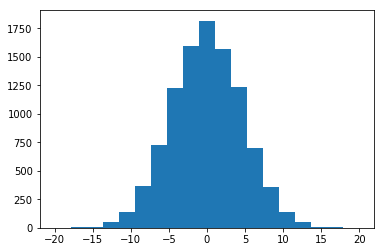

In [7]:
plot_random_walk(samples=samples,walk_length=walk_length)

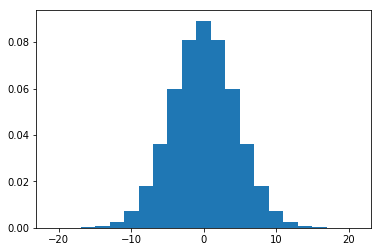

In [8]:
plot_gaussian(walk_length=walk_length)

### Conclusions

The 2 graphs above are very similar, so indeed the Gaussian profile is a good approximation to a Random walk. For a large enough set of samples and random_walks.

**Metric suggestion:** L2 distance between observations' cumulative distribution function and the Guassian distribution.

# III.5

Importing the text as a single string

In [9]:
# You can change quran.txt to any txt file you want to try, and then run all the cells below
f = open('datasets/quran.txt', 'r')
text = ''.join(f.readlines())

Making a word count:

In [10]:
text = text.lower()
for stringy in ["\n",",",".","'",":","?",";","!"]:
    text = text.replace(stringy, "")
words = text.split(" ")
frequency_count = Counter(words)
d = dict(frequency_count)

In [11]:
table = pd.DataFrame(list(d.items()))
table.columns=(["Word","Quran_Count"])
table.sort_values(by="Quran_Count",inplace=True,ascending=False)
table.reset_index(drop=True,inplace=True)
table.head(5)

,Word,Quran_Count
0,the,8725
1,and,7667
2,of,4466
3,to,3641
4,you,3350


Getting the frequency of words in the English dictionary:

In [12]:
f = open('datasets/english_word_count.txt', 'r')
text = f.readlines()
def process_line(line):
    line = line.replace("\n", "")
    return line.split('\t')
frequencies = [process_line(line) for line in text]
frequencies = {x[0]:int(x[1]) for x in frequencies}

Merging the tables:

In [13]:
table['English_word'] = table["Word"].map(frequencies)

In [14]:
table.head(5)

,Word,Quran_Count,English_word
0,the,8725,2.313585e+10
1,and,7667,1.299764e+10
2,of,4466,1.315194e+10
3,to,3641,1.213698e+10
4,you,3350,2.996181e+09


Sorting the table by the ratio of frequencies, where ratio is defined as (up to a scalar):
**Ratio:** Frequency of a word in the text / Frequency of word in common English

In [15]:
table['Ratio'] = np.divide(table['Quran_Count'],table['English_word'])*(10**6)
table.sort_values(by="Ratio",inplace=True,ascending=False)
table.reset_index(drop=True,inplace=True)

In [16]:
table[['Word','Ratio']].head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Word,chastisement,evildoers,tiding,disbelieves,haply,gehenna,unbelievers,whoso,recompensed,unthankful,similitudes,disbelieved,abased,tarried,niggardly,disbelieve,idolaters,couldst,whensoever,smites
Ratio,2275.3,1313.31,1286.81,1177.39,1100.15,962.464,923.551,884.406,874.92,769.769,757.732,715.237,662.663,616.118,595.593,576.764,548.08,536.813,499.322,459.01


# III.7

In [17]:
def max_eigenvalue_approximation(A,n):
    B = A
    for x in range(n): # In the end B = A^(32^n) normalized
        B = np.linalg.matrix_power(B,2**3) # B = A^32
        B = np.divide(B,np.linalg.norm(B)) # Normalizes B
    x = np.random.rand(len(A)) # Generates random A
    x = np.matmul(B,x) # Multiplies x by B, i.e. multiplies x by A 2**32 times
    x = np.divide(x,np.linalg.norm(x)) # Normalizes x
    x = np.matmul(A,x) # Calculates Ax
    eigenvalue = np.linalg.norm(x)
    print("Largest Eigenvalue: " + str(eigenvalue))
    return eigenvalue # This value approximates the max eigenvalue from below

In [18]:
max_eigenvalue_approximation([[1,0],[1,2]],2)

Largest Eigenvalue: 2.0


2.0

# III.8

In [19]:
def return_eigenvalues(A):
    return np.linalg.eigvals(A)

In [20]:
def generate_random_symmetric_bernoulli_matrix(n):
    A = np.random.randint(0,2,[n,n]) # Generates a random (non symmetric) bernoulli matrix
    for i in range(n):
        for j in range(i):
            value = A[i][j]^A[j][i] # Xors the 2 symetric entries so that value is uniform on {0,1}, i.e. the probabilities remain correct.
            A[i][j] = value
            A[j][i] = value
    return A # Returns the new

In [21]:
def iii8_answer():
    A = generate_random_symmetric_bernoulli_matrix(1000)
    return return_eigenvalues(A)

In [22]:
# n is the number of mattrices being run.
# Higher n means waiting for longer, but with more statistical accuracy
def eigenvalue_analysis(n):
    observed = [iii8_answer() for _ in range(n)]
    observed = np.concatenate(observed)
    plt.hist(observed,bins=np.linspace(-35,35,71))
    return observed

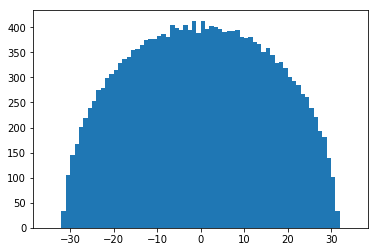

In [23]:
# This line takes a long time to run. Can you improve it?
observed = eigenvalue_analysis(20)

The distribution seems to follow a half ellipse with x-radius of sqrt(1000). The sqrt(1000) limit makes sense since that's the maximum possible eigenvalue for a 1000-sided matrix of zeroes and ones.